In [0]:
#まず、データをdownloadします　
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2020-05-19 00:07:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2020-05-19 00:07:06 (633 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [0]:
#wineデータを対象に、確率的勾配降下法を行います。
#ステップサイズはeta=0.03, 0.01, 0.003の三種類を設定し、 横軸に更新回数、縦軸にそのときの目的関数値(二乗誤差)をプロットします
#ログには終了までの更新回数と終了時の誤差を表示します

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import io

# データを読み込む
wine = pd.read_csv('winequality-red.csv', header=0,  sep=";")
featureName=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates', 'alcohol']
objectiveName=['quality']

# 学習データを作る
sc = StandardScaler()
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values
X = sc.fit_transform(X)
X = np.insert(X, 0, 1, axis=1)
y = wine['quality'].values

# 訓練用のデータを作る
X_train = X[:math.floor(len(y) * 0.8)]
y_train = y[:math.floor(len(y) * 0.8)]
m = len(y_train)            # 学習データの個数

η = 0.03, #step = 306, loss = 0.671487588361502
η = 0.01, #step = 555, loss = 0.6773102644038352
η = 0.003, #step = 1352, loss = 0.5313152369327472


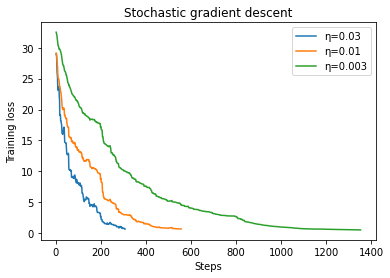

In [0]:
# 各種パラメータ
alpha = 0.01                # 正則化パラメタ
n_update = 10000            # 更新のステップ数
etas = [0.03, 0.01, 0.003]  # ステップサイズ
conv_condition = 20         # 収束の条件として使うステップ数
np.random.seed(seed=0)

plt.figure()
for eta in etas:
  step = 0
  loss_hist = []
  w = np.random.rand(len(X_train[0]),) # パラメータの初期化
  _min = np.inf
  conv_cnt = 0 
  for i in range(n_update):
    pred = np.dot(X_train[i%m], w)
    error = pred - y_train[i%m]
    w = w - eta*(error*X_train[i%m] + alpha/m * 2 * w)   # 更新
    
    loss = mean_squared_error(y_train, 
                              np.dot(X_train,w)) + alpha/m*np.dot(w,w)
    loss_hist.append(loss)
    step = i
    
    # 収束判定
    if _min < loss:
      if conv_cnt == conv_condition:
        print(f"η = {eta}, #step = {i - conv_condition}, loss = {_min}")
        break
      else:
        conv_cnt += 1
    else:
      _min = loss
      conv_cnt = 0
      
  plt.plot(range(1, step-conv_condition+2), 
           loss_hist[:-conv_condition], 
           label= f"η={eta}")
  
plt.xlabel("Steps")
plt.ylabel("Training loss")
plt.title("Stochastic gradient descent")
plt.legend()

plt.show()